# EduTeSt (SoSe 2020) - Projekt

#### Team : Diyar Takak and Quang Anh Le Hong
#### Version : 04.08.2020 23:59
#### Datasets : https://analyse.kmi.open.ac.uk/open_dataset
#### Repository : https://github.com/santomon/edutest_fp
#### Research Question : How does the use of teaching-learning material affect the final results of the students?

# Data Preparation

## Import Data

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Color Scheme

In [2]:
colormap = {"one":"#A0001B",
            "two":"#FF8418",
            "three": "#525252",
            "four": "#1F77B4",
            "five":"#25C254",
            "six":"#B704D6",
            "seven":"#000000",
            "eight": "#0797E3",
            "nine":"#F0D123"
            }

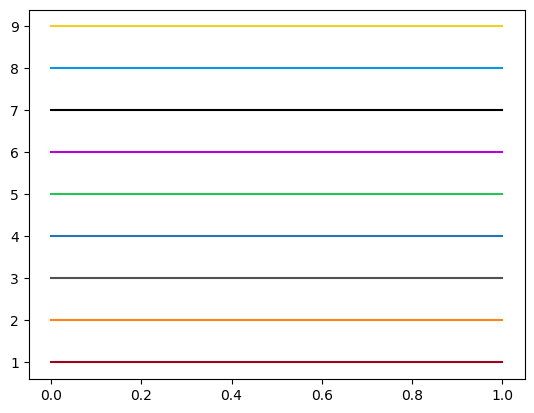

In [3]:
plt.plot([0,1], [1,1], color=colormap["one"])
plt.plot([0,1], [2,2], color=colormap["two"])
plt.plot([0,1], [3,3], color=colormap["three"])
plt.plot([0,1], [4,4], color=colormap["four"])
plt.plot([0,1], [5,5], color=colormap["five"])
plt.plot([0,1], [6,6], color=colormap["six"])
plt.plot([0,1], [7,7], color=colormap["seven"])
plt.plot([0,1], [8,8], color=colormap["eight"])
plt.plot([0,1], [9,9], color=colormap["nine"])


## Assessments Data

Exams that have taken place, type of exam and course allocation

In [4]:
pdAssessments = pd.read_csv("../datasets/assessments.csv")
pdAssessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


## Courses Data

Course ID, when offered and course duration

In [5]:
pdCourses = pd.read_csv("../datasets/courses.csv")
pdCourses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


## Student Assessment

Examinations

In [6]:
pdStudentAssessment = pd.read_csv("../datasets/studentAssessment.csv")
pdStudentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


## Student Info

Information about students, course attendance and results

In [7]:
pdStudentInfo = pd.read_csv("../datasets/studentInfo.csv")
pdStudentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


## Student Registration

Course registration and registration date

In [8]:
pdStudentRegistration = pd.read_csv("../datasets/studentRegistration.csv")
pdStudentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


## Student Vle

Access to virtual learning environments

In [9]:
pdStudentVle = pd.read_csv("../datasets/studentVle.csv")
pdStudentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


## Vle

Information about virtual learning environments and course allocation

In [10]:
pdVle = pd.read_csv("../datasets/vle.csv")
pdVle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


## Merge Data

In [11]:
df1 = pd.merge(pdVle, pdStudentVle)
df2 = pd.merge(df1, pdCourses)
df3 = pd.merge(df2, pdStudentRegistration)
df4 = pd.merge(df3, pdStudentInfo)
df5 = pd.merge(pdAssessments, pdStudentAssessment)
df6 = pd.merge(df4, df5)
df6

,id_site,code_module,code_presentation,activity_type,week_from,week_to,id_student,date,sum_click,module_presentation_length,...,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,assessment_type,weight,date_submitted,is_banked,score
0,546614,AAA,2013J,homepage,NaN,NaN,75091,19,2,268,...,0,60,N,Pass,1752,TMA,10.0,18,0,67.0
1,546954,AAA,2013J,resource,NaN,NaN,75091,19,1,268,...,0,60,N,Pass,1752,TMA,10.0,18,0,67.0
2,546948,AAA,2013J,resource,NaN,NaN,75091,19,3,268,...,0,60,N,Pass,1752,TMA,10.0,18,0,67.0
3,546871,AAA,2013J,subpage,NaN,NaN,75091,19,4,268,...,0,60,N,Pass,1752,TMA,10.0,18,0,67.0
4,546614,AAA,2013J,homepage,NaN,NaN,75091,54,3,268,...,0,60,N,Pass,1753,TMA,20.0,52,0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613957,896943,GGG,2014J,homepage,NaN,NaN,641073,61,2,269,...,0,30,N,Withdrawn,37435,TMA,0.0,61,0,89.0
613958,897071,GGG,2014J,resource,NaN,NaN,641073,61,1,269,...,0,30,N,Withdrawn,37435,TMA,0.0,61,0,89.0
613959,897151,GGG,2014J,subpage,NaN,NaN,641073,124,1,269,...,0,30,N,Withdrawn,37436,TMA,0.0,125,0,82.0
613960,896943,GGG,2014J,homepage,NaN,NaN,641073,124,1,269,...,0,30,N,Withdrawn,37436,TMA,0.0,125,0,82.0


## Export Data for further R work

Finally after merging and preprocessing the data, the dataset is stored into a comma seperated file

In [12]:
df6.to_csv('../merged/merged.csv',encoding='utf-8',index=False)

## Correlation Analysis

just numeric columns

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df6 = df6.select_dtypes(include=numerics)

In [14]:
numeric_df6

,id_site,week_from,week_to,id_student,date,sum_click,module_presentation_length,date_registration,date_unregistration,num_of_prev_attempts,studied_credits,id_assessment,weight,date_submitted,is_banked,score
0,546614,NaN,NaN,75091,19,2,268,-107.0,NaN,0,60,1752,10.0,18,0,67.0
1,546954,NaN,NaN,75091,19,1,268,-107.0,NaN,0,60,1752,10.0,18,0,67.0
2,546948,NaN,NaN,75091,19,3,268,-107.0,NaN,0,60,1752,10.0,18,0,67.0
3,546871,NaN,NaN,75091,19,4,268,-107.0,NaN,0,60,1752,10.0,18,0,67.0
4,546614,NaN,NaN,75091,54,3,268,-107.0,NaN,0,60,1753,20.0,52,0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613957,896943,NaN,NaN,641073,61,2,269,-5.0,171.0,0,30,37435,0.0,61,0,89.0
613958,897071,NaN,NaN,641073,61,1,269,-5.0,171.0,0,30,37435,0.0,61,0,89.0
613959,897151,NaN,NaN,641073,124,1,269,-5.0,171.0,0,30,37436,0.0,125,0,82.0
613960,896943,NaN,NaN,641073,124,1,269,-5.0,171.0,0,30,37436,0.0,125,0,82.0


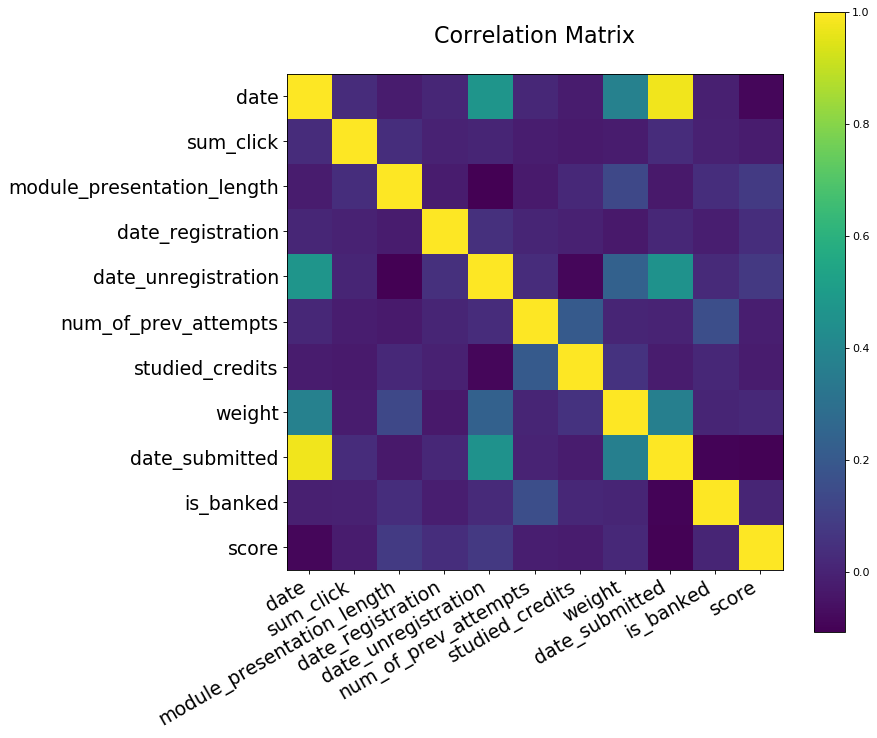

In [15]:
dfCor = numeric_df6
del dfCor['week_to']
del dfCor['week_from']
del dfCor['id_site']
del dfCor['id_student']
del dfCor['id_assessment']
def plotCorrelationMatrix(df, graphWidth):
    fsize=17
    df = df.dropna('rows')
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90,fontsize=fsize)
    plt.yticks(range(len(corr.columns)), corr.columns,fontsize=fsize)
    plt.gca().xaxis.tick_bottom()
    plt.gcf().autofmt_xdate()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix',fontsize=(fsize+3))
    plt.show()
    return corr

cor = plotCorrelationMatrix(dfCor, 10)

## Activity Type vs Score

Critical Point: Sometimes the same Student with the same Assessment is included more than 1 time in the table. The Reason is for example that one student can use 2 different sources with the same activity type. This is not a huge problem because he or she uses different sources (id_site) which means that one student could perform better when she or he uses different sources of the same activity type.

In [16]:
df_ult = df6

80.0   648   51566.0
76.0   465   35524.0
69.0   2927   201974.0
75.0   1219   91690.0
80.0   104354   8300954.0
76.0   755   57294.0
76.0   84840   6460336.0
79.0   80   6309.0
75.0   1326   99523.0
76.0   112349   8535763.0
77.0   802   61635.0
78.0   8431   656856.0
77.0   1523   116740.0
78.0   716   56175.0
74.0   122235   9040323.0
73.0   39490   2890734.0
43.0   2   86.0
74.0   113810   8424200.0
75.0   17676   1332809.0


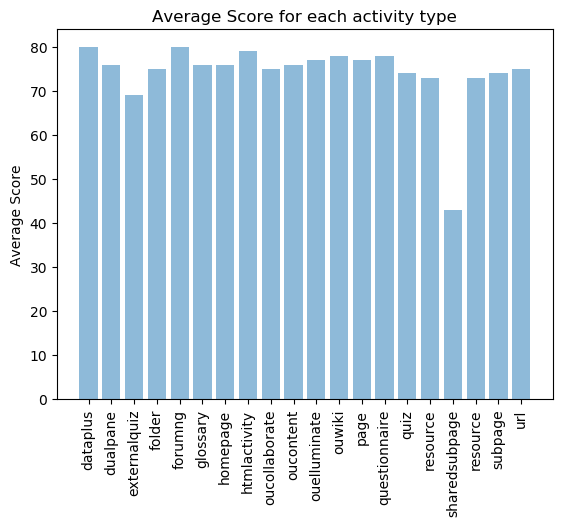

In [17]:
dataplus = 0
dualpane = 0
externalquiz = 0
folder = 0
forumng = 0
glossary = 0
homepage = 0
htmlactivity = 0
oucollaborate = 0
oucontent = 0
ouelluminate = 0
ouwiki = 0
page = 0
questionnaire = 0
quiz = 0
resource = 0
sharedsubpage = 0
subpage = 0
url = 0

dataplus_S = 0
dualpane_S = 0
externalquiz_S = 0
folder_S = 0
forumng_S = 0
glossary_S = 0
homepage_S = 0
htmlactivity_S = 0
oucollaborate_S = 0
oucontent_S = 0
ouelluminate_S = 0
ouwiki_S = 0
page_S = 0
questionnaire_S = 0
quiz_S = 0
resource_S = 0
sharedsubpage_S = 0
subpage_S = 0
url_S = 0

for i in range (len(df_ult)):
    if df_ult.activity_type[i] == "dataplus" and np.isnan(df_ult.score[i]) == False:
        dataplus = dataplus + 1
        dataplus_S = dataplus_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "dualpane" and np.isnan(df_ult.score[i]) == False:
        dualpane = dualpane + 1
        dualpane_S = dualpane_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "externalquiz" and np.isnan(df_ult.score[i]) == False:
        externalquiz = externalquiz + 1
        externalquiz_S = externalquiz_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "folder" and np.isnan(df_ult.score[i]) == False:
        folder = folder + 1
        folder_S = folder_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "forumng" and np.isnan(df_ult.score[i]) == False:
        forumng = forumng + 1
        forumng_S = forumng_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "glossary" and np.isnan(df_ult.score[i]) == False:
        glossary = glossary + 1
        glossary_S = glossary_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "homepage" and np.isnan(df_ult.score[i]) == False:
        homepage = homepage + 1
        homepage_S = homepage_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "htmlactivity" and np.isnan(df_ult.score[i]) == False:
        htmlactivity = htmlactivity + 1
        htmlactivity_S = htmlactivity_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "oucollaborate" and np.isnan(df_ult.score[i]) == False:
        oucollaborate = oucollaborate + 1
        oucollaborate_S = oucollaborate_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "oucontent" and np.isnan(df_ult.score[i]) == False:
        oucontent = oucontent + 1
        oucontent_S = oucontent_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "ouelluminate" and np.isnan(df_ult.score[i]) == False:
        ouelluminate = ouelluminate + 1
        ouelluminate_S = ouelluminate_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "ouwiki" and np.isnan(df_ult.score[i]) == False:
        ouwiki = ouwiki + 1
        ouwiki_S = ouwiki_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "page" and np.isnan(df_ult.score[i]) == False:
        page = page + 1
        page_S = page_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "questionnaire" and np.isnan(df_ult.score[i]) == False:
        questionnaire = questionnaire + 1
        questionnaire_S = questionnaire_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "quiz" and np.isnan(df_ult.score[i]) == False:
        quiz = quiz + 1
        quiz_S = quiz_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "resource" and np.isnan(df_ult.score[i]) == False:
        resource = resource + 1
        resource_S = resource_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "sharedsubpage" and np.isnan(df_ult.score[i]) == False:
        sharedsubpage = sharedsubpage + 1
        sharedsubpage_S = sharedsubpage_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "subpage" and np.isnan(df_ult.score[i]) == False:
        subpage = subpage + 1
        subpage_S = subpage_S + df_ult.score[i]
    elif df_ult.activity_type[i] == "url" and np.isnan(df_ult.score[i]) == False:
        url = url + 1
        url_S = url_S + df_ult.score[i]
    else:
        pass
dataplusMS = round(dataplus_S / dataplus, 0)
dualpaneMS = round(dualpane_S / dualpane, 0)
externalquizMS = round(externalquiz_S / externalquiz, 0)
folderMS = round(folder_S / folder, 0)
forumngMS = round(forumng_S / forumng, 0)
glossaryMS = round(glossary_S / glossary, 0)
homepageMS = round(homepage_S / homepage, 0)
htmlactivityMS = round(htmlactivity_S / htmlactivity, 0)
oucollaborateMS = round(oucollaborate_S / oucollaborate, 0)
oucontentMS = round(oucontent_S / oucontent, 0)
ouelluminateMS = round(ouelluminate_S / ouelluminate, 0)
ouwikiMS = round(ouwiki_S / ouwiki, 0)
pageMS = round(page_S / page, 0)
questionnaireMS = round(questionnaire_S / questionnaire, 0)
quizMS = round(quiz_S / quiz, 0)
resourceMS = round(resource_S / resource, 0)
sharedsubpageMS = round(sharedsubpage_S / sharedsubpage, 0)
subpageMS = round(subpage_S / subpage, 0)
urlMS = round(url_S / url, 0)      

print(dataplusMS," ",dataplus," ",dataplus_S)
print(dualpaneMS," ",dualpane," ",dualpane_S)
print(externalquizMS," ",externalquiz," ",externalquiz_S)
print(folderMS," ",folder," ",folder_S)
print(forumngMS," ",forumng," ",forumng_S)
print(glossaryMS," ",glossary," ",glossary_S)
print(homepageMS," ",homepage," ",homepage_S)
print(htmlactivityMS," ",htmlactivity," ",htmlactivity_S)
print(oucollaborateMS," ",oucollaborate," ",oucollaborate_S)
print(oucontentMS," ",oucontent," ",oucontent_S)
print(ouelluminateMS," ",ouelluminate," ",ouelluminate_S)
print(ouwikiMS," ",ouwiki," ",ouwiki_S)
print(pageMS," ",page," ",page_S)
print(questionnaireMS," ",questionnaire," ",questionnaire_S)
print(quizMS," ",quiz," ",quiz_S)
print(resourceMS," ",resource," ",resource_S)
print(sharedsubpageMS," ",sharedsubpage," ",sharedsubpage_S)
print(subpageMS," ",subpage," ",subpage_S)
print(urlMS," ",url," ",url_S)

objects = ('dataplus','dualpane','externalquiz','folder','forumng','glossary','homepage','htmlactivity','oucollaborate',
'oucontent','ouelluminate','ouwiki','page','questionnaire','quiz','resource','sharedsubpage','resource',
'subpage','url')

y_pos = np.arange(len(objects))
performance = [dataplusMS,dualpaneMS,externalquizMS,folderMS,forumngMS,glossaryMS,homepageMS,htmlactivityMS,oucollaborateMS,
oucontentMS,ouelluminateMS,ouwikiMS,pageMS,questionnaireMS,quizMS,resourceMS,sharedsubpageMS,resourceMS,
subpageMS,urlMS]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Average Score')
plt.title('Average Score for each activity type')

plt.show()
